In [1]:
import pandas as pd

# Display all dataframe columns
pd.set_option('display.max_columns', None)

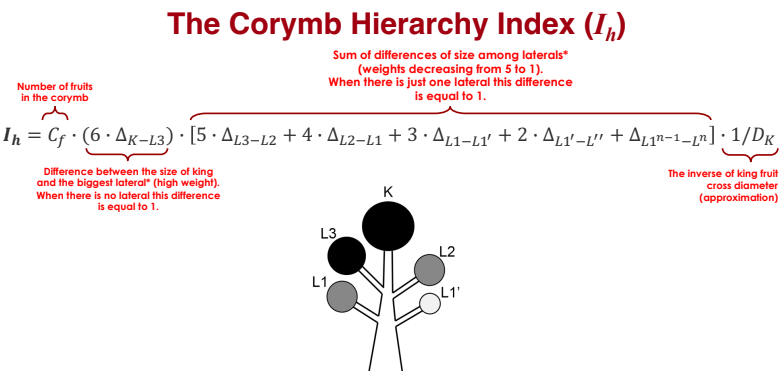

### NOTA: fare riferimento al Foglio Excel con la spiegazione della formula

*A.B.: qui ho rapportato le misure ponendo il centrale uguale ad 1. In questo modo il calcolo dell'indice di gerarchia non viene influenzato dalle dimensioni relative, che considero come fattore a parte.*

In [2]:
def _normalize(lst: list):
    value_max = lst[0]
    return [x / value_max for x in lst]

*A.B.: qui ho calcolato la differenza fra le dimensioni di ogni frutto laterale e quello immediatamente più piccolo.*

In [3]:
def _get_differences(lst: list):
    return [lst[i] - lst[i + 1] if lst[i + 1] != 0 else 0 for i in range(len(lst) - 1)]

In [4]:
def _multiply_by_weights(lst: list, weights):
    return [x * y for x, y in zip(lst, weights)]

*A.B.: Qui faccio un test per evitare che ci siano fattori = 0 nel calcolo dell'indice. Se la differenza fra centrale e laterale più grande è = 1 (cioè non ci sono laterali) allora pongo questo valore = 0.5 (valore arbitrariamente alto), se invece la differenza è = 0 (cioè centrale e laterale più grande hanno la stessa dimensione) pongo questo valore = 0.0005 (valore arbitrariamente basso), Altrimento lascio la differenza uguale al suo valore in riga 26.*

In [5]:
def _dkl(lst: list):
    dkl = lst[0]
    if dkl == 1:
        return 0.5
    elif dkl == 0:
        return 0.0005
    else:
        return dkl

*A.B.: somma delle differenze pesate fra laterali (se ha una valore >0), altrimenti pongo uguale a 1.*

In [6]:
def _dls(lst: list):
    dls = sum(lst[1:])
    if dls <= 0:
        dls = 1
    return dls

In [7]:
def botton_score(f_lst: list, w=[6, 5, 4, 3, 2, 1]):
    # get number of non-zero F
    cf = sum(1 for x in f_lst if x != 0)
    inv_d = 1/f_lst[0]
    # compute normalization of Fs 
    f_norm = _normalize(f_lst)
    # compute differences form F_(i) and F_(i+1)
    f_diff = _get_differences(f_norm)
    # multiply by weights
    f_diff_w = _multiply_by_weights(lst=f_diff, weights=w)
    # compute dkl
    dkl = _dkl(f_diff_w)
    # compute dls
    dls = _dls(f_diff_w)
    ih = cf * dkl * dls * inv_d
    return ih if ih != 0 else 0.00064

In [8]:
# Example 1 test A. Botton (test result: 0.02854)
ex1 = [16.3, 15.9, 15.1, 14.8, 13.1, 0] # need to be sorted from largest to smallest
print(f"Botton Score ex1: {botton_score(ex1)}")

# Example 2 test A. Botton (test result: 0.25419)
ex2 = [14, 10.9, 8.4, 0, 0, 0] # need to be sorted from largest to smallest
print(f"Botton Score ex2: {botton_score(ex2)}")

Botton Score ex1: 0.028540110978544798
Botton Score ex2: 0.2541909620991254


In [9]:
df = pd.read_csv("RawDataset_All_varieties_All_treatments_02.05.24.csv", sep = ";")

In [10]:
df.head(5)

,Year,Cultivar,Trial Code,Treatment,Dosage,BreviSmart,Corymb No.,F1,F2,F3,F4,F5,F6,F7,Fruitdrop (%)
0,2018,Golden Delicious,PD2018,UTC,NaN,NaN,1,16.3,15.5,15.4,13.1,0.0,0.0,0.0,75%
1,2018,Golden Delicious,PD2018,UTC,NaN,NaN,2,17.3,14.7,12.2,0.0,0.0,0.0,0.0,33%
2,2018,Golden Delicious,PD2018,UTC,NaN,NaN,3,15.6,15.0,13.5,12.7,0.0,0.0,0.0,25%
3,2018,Golden Delicious,PD2018,UTC,NaN,NaN,4,16.4,15.8,12.8,9.0,0.0,0.0,0.0,50%
4,2018,Golden Delicious,PD2018,UTC,NaN,NaN,5,15.7,12.5,11.9,0.0,0.0,0.0,0.0,67%


Attributi:

- **Year**: anno del rilievo.
- **Cultivar**: tipo di cultivar del meleto.
- **Trial Code**:
- **Treatment**:
- **Dosage**:
- **BreviSmart**:
- **Corymb No.**:
- **F1**:
- **F2**:
- **F3**:
- **F4**:
- **F5**:
- **F6**:
- **F7**:
- **Fruitdrop**:


In [11]:
# create a target column of float number from 0.0 to 1.0
df['target'] = df['Fruitdrop (%)'].str.replace('%', '').astype(float) /100

In [12]:
# dataframe structure and non-null counts
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10432 entries, 0 to 10431
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           10432 non-null  int64  
 1   Cultivar       10432 non-null  object 
 2   Trial Code     10432 non-null  object 
 3   Treatment      10432 non-null  object 
 4   Dosage         7517 non-null   float64
 5   BreviSmart     5833 non-null   object 
 6   Corymb No.     10432 non-null  int64  
 7   F1             10432 non-null  float64
 8   F2             10432 non-null  float64
 9   F3             10432 non-null  float64
 10  F4             10432 non-null  float64
 11  F5             10432 non-null  float64
 12  F6             10432 non-null  float64
 13  F7             10432 non-null  float64
 14  Fruitdrop (%)  10432 non-null  object 
 15  target         10432 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 1.3+ MB


In [13]:
# Summary statistics
df.describe()  

,Year,Dosage,Corymb No.,F1,F2,F3,F4,F5,F6,F7,target
count,10432.000000,7517.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000
mean,2021.434433,95.397605,47.258627,14.786241,13.015550,11.275913,9.037073,5.627528,1.127502,0.013820,0.650758
std,1.537102,188.356266,31.783613,4.157824,4.333677,4.576105,5.042493,5.185416,2.970939,0.328469,0.326164
min,2015.000000,1.100000,1.000000,3.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,1.650000,21.000000,11.770000,10.220000,8.897500,6.607500,0.000000,0.000000,0.000000,0.400000
50%,2022.000000,2.200000,43.000000,14.495000,12.760000,11.300000,9.700000,6.235000,0.000000,0.000000,0.750000
75%,2023.000000,2.200000,71.000000,17.700000,15.900000,14.020000,12.210000,9.740000,0.000000,0.000000,1.000000
max,2023.000000,800.000000,200.000000,31.370000,26.840000,24.710000,22.820000,22.020000,21.300000,11.000000,1.000000


In [14]:
print(df.apply(lambda col: col.unique()))

Year                    [2018, 2019, 2020, 2015, 2021, 2022, 2023]
Cultivar         [Golden Delicious, Pink Lady, Gala, Braeburn, ...
Trial Code       [PD2018, PD2019, VM2018, CL2018_T2, CL2018_T5,...
Treatment                                   [UTC, Brevis, BA, ACC]
Dosage           [nan, 1.1, 2.2, 1.65, 400.0, 200.0, 600.0, 800.0]
BreviSmart        [nan, Red, DarkGreen, Green, LightGreen, Yellow]
Corymb No.       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
F1               [16.3, 17.3, 15.6, 16.4, 15.7, 15.8, 15.1, 13....
F2               [15.5, 14.7, 15.0, 15.8, 12.5, 14.1, 17.2, 9.7...
F3               [15.4, 12.2, 13.5, 12.8, 11.9, 11.0, 16.2, 7.5...
F4               [13.1, 0.0, 12.7, 9.0, 9.5, 13.3, 13.7, 13.5, ...
F5               [0.0, 13.5, 11.5, 7.5, 7.3, 14.8, 16.5, 10.0, ...
F6               [0.0, 4.14, 3.38, 3.69, 8.11, 7.53, 4.41, 9.18...
F7               [0.0, 4.3, 7.5, 8.0, 6.1, 6.18, 10.0, 9.0, 5.9...
Fruitdrop (%)    [75%, 33%, 25%, 50%, 67%, 100%, 0%, 40%, 60%,

In [15]:
# frequencies
columns_name = ['Year', 'Cultivar', 'Treatment', 'BreviSmart']
for name in columns_name:
    freq = df[name].value_counts()
    print(freq)
    print("-"*40)

Year
2023    3643
2021    2172
2022    1852
2020    1653
2018     581
2019     494
2015      37
Name: count, dtype: int64
----------------------------------------
Cultivar
Golden Delicious    5074
Braeburn            1860
Gala                1392
Fuji                 597
Elstar               518
Joya                 500
Golden               204
Red Delicious        160
Pink Lady            127
Name: count, dtype: int64
----------------------------------------
Treatment
Brevis    5833
UTC       1861
ACC       1684
BA        1054
Name: count, dtype: int64
----------------------------------------
BreviSmart
Green         1735
LightGreen    1654
DarkGreen     1285
Yellow         635
Red            524
Name: count, dtype: int64
----------------------------------------


In [16]:
df.head()

,Year,Cultivar,Trial Code,Treatment,Dosage,BreviSmart,Corymb No.,F1,F2,F3,F4,F5,F6,F7,Fruitdrop (%),target
0,2018,Golden Delicious,PD2018,UTC,NaN,NaN,1,16.3,15.5,15.4,13.1,0.0,0.0,0.0,75%,0.75
1,2018,Golden Delicious,PD2018,UTC,NaN,NaN,2,17.3,14.7,12.2,0.0,0.0,0.0,0.0,33%,0.33
2,2018,Golden Delicious,PD2018,UTC,NaN,NaN,3,15.6,15.0,13.5,12.7,0.0,0.0,0.0,25%,0.25
3,2018,Golden Delicious,PD2018,UTC,NaN,NaN,4,16.4,15.8,12.8,9.0,0.0,0.0,0.0,50%,0.50
4,2018,Golden Delicious,PD2018,UTC,NaN,NaN,5,15.7,12.5,11.9,0.0,0.0,0.0,0.0,67%,0.67


### Calcolo del Botton Score

In [17]:
def botton_score_df(df):
    lst = df.iloc[:, 7:14].values.tolist()
    botton = []
    for l in lst:
        botton.append(botton_score(l))
    return botton

In [18]:
df['botton_score'] = botton_score_df(df)

In [19]:
df.head()

,Year,Cultivar,Trial Code,Treatment,Dosage,BreviSmart,Corymb No.,F1,F2,F3,F4,F5,F6,F7,Fruitdrop (%),target,botton_score
0,2018,Golden Delicious,PD2018,UTC,NaN,NaN,1,16.3,15.5,15.4,13.1,0.0,0.0,0.0,75%,0.75,0.043004
1,2018,Golden Delicious,PD2018,UTC,NaN,NaN,2,17.3,14.7,12.2,0.0,0.0,0.0,0.0,33%,0.33,0.112984
2,2018,Golden Delicious,PD2018,UTC,NaN,NaN,3,15.6,15.0,13.5,12.7,0.0,0.0,0.0,25%,0.25,0.040586
3,2018,Golden Delicious,PD2018,UTC,NaN,NaN,4,16.4,15.8,12.8,9.0,0.0,0.0,0.0,50%,0.50,0.098591
4,2018,Golden Delicious,PD2018,UTC,NaN,NaN,5,15.7,12.5,11.9,0.0,0.0,0.0,0.0,67%,0.67,0.044652


### Calcolo delle Metriche

Dato il vettore $\mathbf{F} = \left ( f_{1},  f_{2}, f_{3}, f_{4}, f_{5}, f_{6}, f_{7}\right )^{\top}$, dove $f_{i} \in \mathbf{F}$ esprime il diametro, si sono calcolate le seguenti metriche:

- **max**: massimo valore in $\mathbf{F}$, ossia $\max(\mathbf{F})$,
- **min**: minimo valore in $\mathbf{F}$, ossia $\min(\mathbf{F})$ tra gli elementi non zero $f_{i} \in \mathbf{F} \neq 0$,
- **mean**: meadia dei valori di $\mathbf{F}$ tra gli elementi non zero $f_{i} \in \mathbf{F} \neq 0$,
- **std**: deviazione standard di $\mathbf{F}$ tra gli elementi non zero $f_{i} \in \mathbf{F} \neq 0$, 
- **median**: meadiana dei valori di $\mathbf{F}$ tra gli elementi non zero $f_{i} \in \mathbf{F} \neq 0$,
- **sum**: somma totale dei diametri di $\mathbf{F}$,
- **non_zero_per_row**: numero di frutti per corimbo (ossia conta il numero di volte che $f_{i} \in \mathbf{F} \neq 0$).
- **non_zero_ratio**: rapporto tra il numero di elementi $f_{i} \in \mathbf{F} \neq 0$ e il numero di elementi totali,
- **range_F1_F2**: differenza tra $f_{1}$ e $f_{2}$, ossia $f_{1} - f_{2}$


**NOTE**: Il min dei diametri per ogni corimbo forse era più sensato prenderlo tra i nonzeri; stessa cosa per media/mediana. Verificherei se facendo così i numeri migliorano.

In [20]:
import numpy as np

# Sostituire gli zeri con NaN
df = df.replace(0, np.nan)
df.head()

,Year,Cultivar,Trial Code,Treatment,Dosage,BreviSmart,Corymb No.,F1,F2,F3,F4,F5,F6,F7,Fruitdrop (%),target,botton_score
0,2018,Golden Delicious,PD2018,UTC,NaN,NaN,1,16.3,15.5,15.4,13.1,NaN,NaN,NaN,75%,0.75,0.043004
1,2018,Golden Delicious,PD2018,UTC,NaN,NaN,2,17.3,14.7,12.2,NaN,NaN,NaN,NaN,33%,0.33,0.112984
2,2018,Golden Delicious,PD2018,UTC,NaN,NaN,3,15.6,15.0,13.5,12.7,NaN,NaN,NaN,25%,0.25,0.040586
3,2018,Golden Delicious,PD2018,UTC,NaN,NaN,4,16.4,15.8,12.8,9.0,NaN,NaN,NaN,50%,0.50,0.098591
4,2018,Golden Delicious,PD2018,UTC,NaN,NaN,5,15.7,12.5,11.9,NaN,NaN,NaN,NaN,67%,0.67,0.044652


In [21]:
# maximum Corymb diameter values (non-zero)
df['max'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].max(axis=1)

# minumum Corymb diameter values (non-zero)
df['min'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].min(axis=1)

# range Corymb diameter Max and Min (non-zero) values
df['range'] = df['max'] - df['min']

# mean Corymb diameter values (non-zero)
df['mean'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].mean(axis=1)

# standard deviation diameter values (non-zero)
df['std'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].std(axis=1)

# median Corymb diameter values (non-zero)
df['median'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].median(axis=1)

# total diameter sum 
df['sum'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].sum(axis=1)

# df['non_zero_per_row'] = (df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']] != np.nan).sum(axis=1)
df['non_zero_per_row'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].notna().sum(axis=1) 

#df['non_zero_ratio'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].apply(lambda row: (row != np.nan).sum() / len(row), axis=1)
df['non_zero_ratio'] = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']].notna().sum(axis=1)/7

# 
df["F1_F2_range"] = df['F1'] - df['F2']

In [22]:
df.head(5)

,Year,Cultivar,Trial Code,Treatment,Dosage,BreviSmart,Corymb No.,F1,F2,F3,F4,F5,F6,F7,Fruitdrop (%),target,botton_score,max,min,range,mean,std,median,sum,non_zero_per_row,non_zero_ratio,F1_F2_range
0,2018,Golden Delicious,PD2018,UTC,NaN,NaN,1,16.3,15.5,15.4,13.1,NaN,NaN,NaN,75%,0.75,0.043004,16.3,13.1,3.2,15.075000,1.376893,15.45,60.3,4,0.571429,0.8
1,2018,Golden Delicious,PD2018,UTC,NaN,NaN,2,17.3,14.7,12.2,NaN,NaN,NaN,NaN,33%,0.33,0.112984,17.3,12.2,5.1,14.733333,2.550163,14.70,44.2,3,0.428571,2.6
2,2018,Golden Delicious,PD2018,UTC,NaN,NaN,3,15.6,15.0,13.5,12.7,NaN,NaN,NaN,25%,0.25,0.040586,15.6,12.7,2.9,14.200000,1.334166,14.25,56.8,4,0.571429,0.6
3,2018,Golden Delicious,PD2018,UTC,NaN,NaN,4,16.4,15.8,12.8,9.0,NaN,NaN,NaN,50%,0.50,0.098591,16.4,9.0,7.4,13.500000,3.388215,14.30,54.0,4,0.571429,0.6
4,2018,Golden Delicious,PD2018,UTC,NaN,NaN,5,15.7,12.5,11.9,NaN,NaN,NaN,NaN,67%,0.67,0.044652,15.7,11.9,3.8,13.366667,2.042874,12.50,40.1,3,0.428571,3.2


In [23]:
# Replace Nan to zero 
df = df.replace(np.nan, 0)
df.head()

,Year,Cultivar,Trial Code,Treatment,Dosage,BreviSmart,Corymb No.,F1,F2,F3,F4,F5,F6,F7,Fruitdrop (%),target,botton_score,max,min,range,mean,std,median,sum,non_zero_per_row,non_zero_ratio,F1_F2_range
0,2018,Golden Delicious,PD2018,UTC,0.0,0,1,16.3,15.5,15.4,13.1,0.0,0.0,0.0,75%,0.75,0.043004,16.3,13.1,3.2,15.075000,1.376893,15.45,60.3,4,0.571429,0.8
1,2018,Golden Delicious,PD2018,UTC,0.0,0,2,17.3,14.7,12.2,0.0,0.0,0.0,0.0,33%,0.33,0.112984,17.3,12.2,5.1,14.733333,2.550163,14.70,44.2,3,0.428571,2.6
2,2018,Golden Delicious,PD2018,UTC,0.0,0,3,15.6,15.0,13.5,12.7,0.0,0.0,0.0,25%,0.25,0.040586,15.6,12.7,2.9,14.200000,1.334166,14.25,56.8,4,0.571429,0.6
3,2018,Golden Delicious,PD2018,UTC,0.0,0,4,16.4,15.8,12.8,9.0,0.0,0.0,0.0,50%,0.50,0.098591,16.4,9.0,7.4,13.500000,3.388215,14.30,54.0,4,0.571429,0.6
4,2018,Golden Delicious,PD2018,UTC,0.0,0,5,15.7,12.5,11.9,0.0,0.0,0.0,0.0,67%,0.67,0.044652,15.7,11.9,3.8,13.366667,2.042874,12.50,40.1,3,0.428571,3.2


#### **Analisi**


In [24]:
seed = 42
# number_of_iter=1000000
number_of_iter=100000

### Step 1) prendere dati senza trattamento e fittarci il modello. Fare split 80/20 train-test, più una 5-fold CV per la selezione degli iperparametri. Vedere errore del modello (direi errore quadratico) su dati di test.

In [25]:
utc_df = df[df['Treatment'] == 'UTC']
# check if all samples are UTC
print(utc_df.apply(lambda col: col.unique()))

Year                             [2018, 2019, 2020, 2021, 2022, 2023]
Cultivar            [Golden Delicious, Golden, Elstar, Braeburn, F...
Trial Code          [PD2018, PD2019, VM2018, MC2020, PD2021_F, PD2...
Treatment                                                       [UTC]
Dosage                                                          [0.0]
BreviSmart                                                        [0]
Corymb No.          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
F1                  [16.3, 17.3, 15.6, 16.4, 15.7, 15.8, 15.1, 13....
F2                  [15.5, 14.7, 15.0, 15.8, 12.5, 14.1, 17.2, 9.7...
F3                  [15.4, 12.2, 13.5, 12.8, 11.9, 11.0, 16.2, 7.5...
F4                  [13.1, 0.0, 12.7, 9.0, 9.5, 13.3, 13.7, 13.5, ...
F5                  [0.0, 13.5, 11.5, 7.5, 7.3, 14.8, 16.5, 10.0, ...
F6                  [0.0, 7.11, 7.46, 6.84, 3.66, 5.16, 6.06, 7.24...
F7                                             [0.0, 11.0, 6.0, 10.0]
Fruitdrop (%)       

In [26]:
df.columns

Index(['Year', 'Cultivar', 'Trial Code', 'Treatment', 'Dosage', 'BreviSmart',
       'Corymb No.', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'Fruitdrop (%)',
       'target', 'botton_score', 'max', 'min', 'range', 'mean', 'std',
       'median', 'sum', 'non_zero_per_row', 'non_zero_ratio', 'F1_F2_range'],
      dtype='object')

In [27]:
# create a df with metrics and 
utc_df = utc_df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'max', 'min', 'range', 'mean', 'std', 'median', 'sum', 'non_zero_per_row', 'non_zero_ratio', 'F1_F2_range', 'target', 'botton_score']]
utc_df.head(5)

,F1,F2,F3,F4,F5,F6,F7,max,min,range,mean,std,median,sum,non_zero_per_row,non_zero_ratio,F1_F2_range,target,botton_score
0,16.3,15.5,15.4,13.1,0.0,0.0,0.0,16.3,13.1,3.2,15.075000,1.376893,15.45,60.3,4,0.571429,0.8,0.75,0.043004
1,17.3,14.7,12.2,0.0,0.0,0.0,0.0,17.3,12.2,5.1,14.733333,2.550163,14.70,44.2,3,0.428571,2.6,0.33,0.112984
2,15.6,15.0,13.5,12.7,0.0,0.0,0.0,15.6,12.7,2.9,14.200000,1.334166,14.25,56.8,4,0.571429,0.6,0.25,0.040586
3,16.4,15.8,12.8,9.0,0.0,0.0,0.0,16.4,9.0,7.4,13.500000,3.388215,14.30,54.0,4,0.571429,0.6,0.50,0.098591
4,15.7,12.5,11.9,0.0,0.0,0.0,0.0,15.7,11.9,3.8,13.366667,2.042874,12.50,40.1,3,0.428571,3.2,0.67,0.044652


In [28]:
print(f"Number of UTC samples: {utc_df.shape[0]}")

Number of UTC samples: 1861


In [29]:
from sklearn.model_selection import train_test_split

utc_metrics = utc_df.drop(['target'], axis=1)
utc_target = utc_df['target'] 

# 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(utc_metrics, utc_target, test_size=0.20, random_state=seed)

print(f"Number of training samples: {len(y_train)}")
print(f"Number of test samples: {len(y_test)}")

Number of training samples: 1488
Number of test samples: 373


In [30]:
# Get Botton score train and test
B_train = X_train['botton_score']
B_test = X_test['botton_score']

X_train = X_train.drop(['botton_score'], axis=1)
X_test = X_test.drop(['botton_score'], axis=1)

In [31]:
X_train.head()

,F1,F2,F3,F4,F5,F6,F7,max,min,range,mean,std,median,sum,non_zero_per_row,non_zero_ratio,F1_F2_range
6333,9.06,7.64,7.36,7.33,4.23,3.28,0.0,9.06,3.28,5.78,6.483333,2.227166,7.345,38.90,6,0.857143,1.42
5711,22.75,22.38,21.86,16.84,16.05,0.00,0.0,22.75,16.05,6.70,19.976000,3.250835,21.860,99.88,5,0.714286,0.37
9727,20.09,18.79,17.81,10.64,7.47,0.00,0.0,20.09,7.47,12.62,14.960000,5.564863,17.810,74.80,5,0.714286,1.30
6348,10.39,9.81,9.74,9.33,8.49,8.27,0.0,10.39,8.27,2.12,9.338333,0.818643,9.535,56.03,6,0.857143,0.58
6304,10.94,10.36,9.68,9.48,9.42,4.72,0.0,10.94,4.72,6.22,9.100000,2.224446,9.580,54.60,6,0.857143,0.58


In [32]:
# Convert in a NumPy array 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [33]:
from sklearn.preprocessing import StandardScaler

# Normalizzazione dei dati
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [34]:
X_train_scaled[0]

array([-1.30724106, -1.08526299, -0.7328614 , -0.23010188, -0.06415257,
        0.79690757, -0.04370288, -1.30724106, -1.63050775,  0.41661067,
       -1.48956637,  0.17374995, -1.29473583, -0.71385997,  1.41749834,
        1.41749834,  0.07047182])

### 1.1) regressione lineare

In [35]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Traning
print("Traning")
print("-" * 50)
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# create model
model = LinearRegression()

train_mse_scores = []
for i, (train_index, validation_index) in enumerate(kf.split(X_train_scaled)):
    print(f"Fold {i}:")
    print(f"  Train: {len(train_index)}")
    print(f"  validation:  {len(validation_index)}")
    X_train_scaled_fold, X_val_scaled_fold = X_train_scaled[train_index], X_train_scaled[validation_index]
    y_train_scaled_fold, y_val_scaled_fold = y_train_scaled[train_index], y_train_scaled[validation_index]
    
    # fit model
    model.fit(X_train_scaled_fold, y_train_scaled_fold)
    
    # get prediction
    y_pred_scaled_fold = model.predict(X_val_scaled_fold)

    # inverse normalization 
    y_pred_fold_real = scaler_y.inverse_transform(y_pred_scaled_fold.reshape(-1, 1)).ravel()
    y_val_fold_real = scaler_y.inverse_transform(y_val_scaled_fold.reshape(-1, 1)).ravel()
    
    # compute mean squared error (MSE) for validation
    mse = mean_squared_error(y_val_fold_real, y_pred_fold_real)
    train_mse_scores.append(mse)
    print(f"  Fold MSE: {mse}")
    print("")

# Results
# print("MSE for each folder:", mse_scores)
print("Traning MSE mean:", float(np.mean(train_mse_scores)))
print("")

# Testing
print("Testing")
print("-" * 50)
# Train the model on the complete training data
model.fit(X_train_scaled, y_train_scaled)

# get prediction for testing data
y_test_pred_scaled = model.predict(X_test_scaled)

# inverse normalization
y_pred_real = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()
    

# Compute MSE for testing
mse_test = mean_squared_error(y_test_real, y_pred_real)
print(f"Testing MSE (only UTC): {mse_test}")

# Compute MSE for Botton
mse_botton_lr = mean_squared_error(y_test_real, B_test)
print(f"Botton MSE (only UTC): {mse_botton_lr}")

Traning
--------------------------------------------------
Fold 0:
  Train: 1190
  validation:  298
  Fold MSE: 0.07853530825312219

Fold 1:
  Train: 1190
  validation:  298
  Fold MSE: 0.07518508912782186

Fold 2:
  Train: 1190
  validation:  298
  Fold MSE: 0.07222163842679032

Fold 3:
  Train: 1191
  validation:  297
  Fold MSE: 0.07634560004371962

Fold 4:
  Train: 1191
  validation:  297
  Fold MSE: 0.06730112416673169

Traning MSE mean: 0.07391775200363714

Testing
--------------------------------------------------
Testing MSE (only UTC): 0.0642712788069496
Botton MSE (only UTC): 0.18185727278412428


### 1.2) regressione nonlineare con SVR (Support Vector Regression)

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, make_scorer

In [37]:
param_dist = {
    'C': uniform(0.01, 1000),         
    'gamma': uniform(0.001, 1000), 
    'epsilon': uniform(0.001, 1000),
}

In [38]:
# TAKE A LOT OF TIMES!!! (more than one day)

result_values = {}


# set the model 
svr_model = SVR(kernel='rbf')
    
# Randomized search on hyper parameters
random_search = RandomizedSearchCV(
    svr_model, 
    param_distributions=param_dist,
    scoring="neg_mean_squared_error",
    n_iter=number_of_iter, 
    random_state=seed, 
    cv=5, 
    n_jobs=-1,
    verbose=2
)

# Performing random search on hyperparameters
random_search.fit(X_train_scaled, y_train_scaled)
    
# get best parameters for each degree
result_values['best_param'] = random_search.best_params_

# get best training soce 
result_values['best_score'] = -random_search.best_score_
print(f"Training MSE: {-random_search.best_score_}")
    
# get best estimator
best_svr_model = random_search.best_estimator_
    
# 
y_pred_scaled = best_svr_model.predict(X_test_scaled)

# Inversa della normalizzazione per ottenere i valori reali
y_pred_real = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# compute test MSE
mse = mean_squared_error(y_test_real, y_pred_real)
result_values['test_mse'] = mse
print(f"test MSE (only UTC): {mse}")
    
# Compute MSE for Botton
mse_botton_svr = mean_squared_error(y_test_real, B_test)
print(f"Botton SVR MSE (only UTC): {mse_botton_svr}")

Fitting 5 folds for each of 100000 candidates, totalling 500000 fits
Training MSE: 0.9461193324900469
test MSE (only UTC): 0.10316020101927251
Botton SVR MSE (only UTC): 0.18185727278412428


### NOTA: per il training Error MSE non è stata eseguita l'inversa della normalizzazione

In [39]:
print(f"Best C: {float(result_values.get('best_param').get('C'))}")
print(f"Best gamma: {float(result_values.get('best_param').get('gamma'))}")
print(f"Best epsilon: {float(result_values.get('best_param').get('epsilon'))}")
print(f"Best CV MSE (without inverse of normalization): {float(result_values.get('best_score'))}")
print(f"Best Test MSE (with inverse of normalization): {float(result_values.get('test_mse'))}")
print("-"*50)
print(f"Botton liner regression MSE (only UTC): {mse_botton_lr}")
print(f"Botton SVR MSE (only UTC): {mse_botton_svr}")

Best C: 859.1745536986573
Best gamma: 14.230955579801888
Best epsilon: 0.015606622623758448
Best CV MSE (without inverse of normalization): 0.9461193324900469
Best Test MSE (with inverse of normalization): 0.10316020101927251
--------------------------------------------------
Botton liner regression MSE (only UTC): 0.18185727278412428
Botton SVR MSE (only UTC): 0.18185727278412428


### Step 2) Come sopra, ma utilizzando tutti i dati. Non aggiungere per il momento alle features il tipo di trattamento. Nello split train/test e nella CV fare suddivisione stratificata mantenendo la proporzionalità dei dati rispetto al tipo di trattamento.

In [40]:
df_clean = df[['Treatment', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'max', 'min', 'range', 'mean', 'std', 'median', 'sum', 'non_zero_per_row', 'non_zero_ratio', 'F1_F2_range', 'target', 'botton_score']]
df_clean.head()

,Treatment,F1,F2,F3,F4,F5,F6,F7,max,min,range,mean,std,median,sum,non_zero_per_row,non_zero_ratio,F1_F2_range,target,botton_score
0,UTC,16.3,15.5,15.4,13.1,0.0,0.0,0.0,16.3,13.1,3.2,15.075000,1.376893,15.45,60.3,4,0.571429,0.8,0.75,0.043004
1,UTC,17.3,14.7,12.2,0.0,0.0,0.0,0.0,17.3,12.2,5.1,14.733333,2.550163,14.70,44.2,3,0.428571,2.6,0.33,0.112984
2,UTC,15.6,15.0,13.5,12.7,0.0,0.0,0.0,15.6,12.7,2.9,14.200000,1.334166,14.25,56.8,4,0.571429,0.6,0.25,0.040586
3,UTC,16.4,15.8,12.8,9.0,0.0,0.0,0.0,16.4,9.0,7.4,13.500000,3.388215,14.30,54.0,4,0.571429,0.6,0.50,0.098591
4,UTC,15.7,12.5,11.9,0.0,0.0,0.0,0.0,15.7,11.9,3.8,13.366667,2.042874,12.50,40.1,3,0.428571,3.2,0.67,0.044652


In [41]:
metrics = df_clean.drop(['target'], axis=1)
target = df_clean['target'] 
treatment = df_clean['Treatment']

print(f"number of samples: {len(metrics)}")

number of samples: 10432


In [42]:
import matplotlib.pyplot as plt
from collections import Counter

def display_hist(treatment):
    # Count the frequency of each category
    frequencies = Counter(treatment)
    # Extract categories and their frequencies
    categories = list(frequencies.keys())
    values = list(frequencies.values())
    # Create the bar chart
    plt.bar(categories, values, color='skyblue', edgecolor='black', alpha=0.7)
    # Add labels and title
    plt.title('Category Histogram')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    # Show the chart
    plt.show()


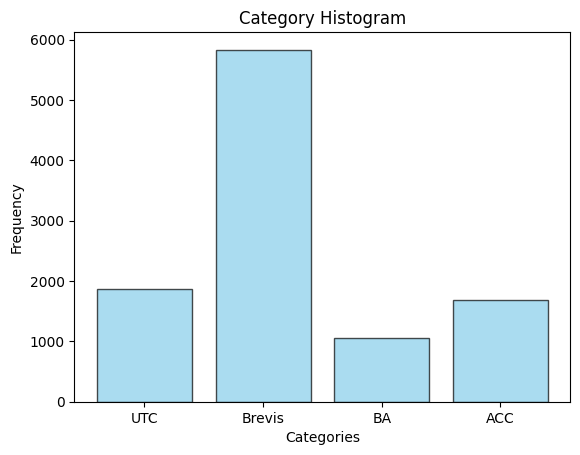

In [43]:
display_hist(treatment)

In [44]:
# 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(metrics, target, test_size=0.20, random_state=seed, stratify=treatment)

print(f"Number of training samples: {len(y_train)}")
print(f"Number of test samples: {len(y_test)}")

Number of training samples: 8345
Number of test samples: 2087


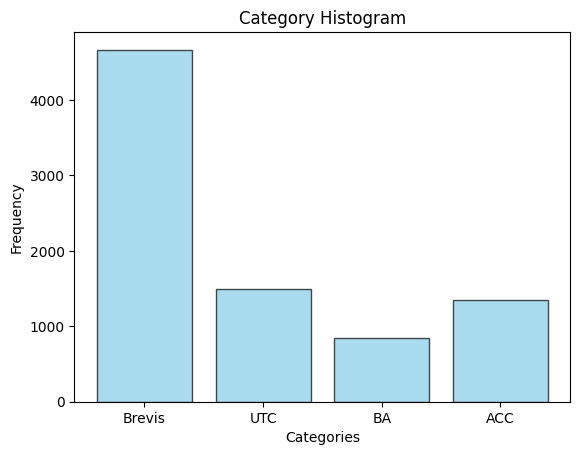

In [45]:
display_hist(X_train["Treatment"])

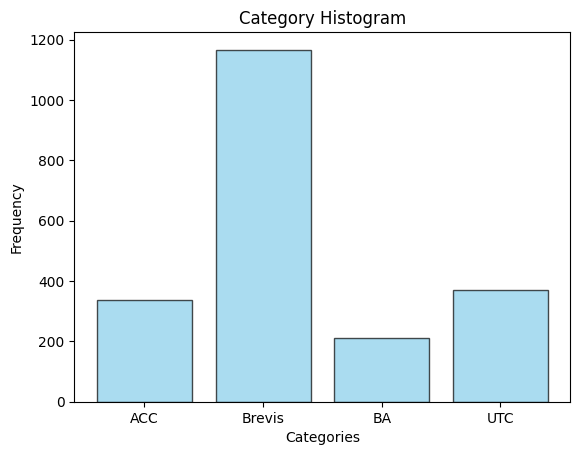

In [46]:
display_hist(X_test["Treatment"])

In [47]:
# drop Treatment
X_train = X_train.drop(['Treatment'], axis=1)
X_test = X_test.drop(['Treatment'], axis=1)

In [48]:
# Get Botton score train and test
B_train = X_train['botton_score']
B_test = X_test['botton_score']

X_train = X_train.drop(['botton_score'], axis=1)
X_test = X_test.drop(['botton_score'], axis=1)

In [49]:
# Convert in a NumPy array 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [50]:
from sklearn.preprocessing import StandardScaler

# Normalizzazione dei dati
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

### 2.1) regressione lineare

In [51]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [52]:
# Traning
print("Traning")
print("-" * 50)
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# create model
model = LinearRegression()

train_mse_scores = []
for i, (train_index, validation_index) in enumerate(kf.split(X_train_scaled)):
    print(f"Fold {i}:")
    print(f"  Train: {len(train_index)}")
    print(f"  validation:  {len(validation_index)}")
    X_train_scaled_fold, X_val_scaled_fold = X_train_scaled[train_index], X_train_scaled[validation_index]
    y_train_scaled_fold, y_val_scaled_fold = y_train_scaled[train_index], y_train_scaled[validation_index]
    
    # fit model
    model.fit(X_train_scaled_fold, y_train_scaled_fold)
    
    # get prediction
    y_pred_scaled_fold = model.predict(X_val_scaled_fold)

    # inverse normalization 
    y_pred_fold_real = scaler_y.inverse_transform(y_pred_scaled_fold.reshape(-1, 1)).ravel()
    y_val_fold_real = scaler_y.inverse_transform(y_val_scaled_fold.reshape(-1, 1)).ravel()
    
    # compute mean squared error (MSE) for validation
    mse = mean_squared_error(y_val_fold_real, y_pred_fold_real)
    train_mse_scores.append(mse)
    print(f"  Fold MSE: {mse}")
    print("")

# Results
# print("MSE for each folder:", mse_scores)
print("Traning MSE mean:", float(np.mean(train_mse_scores)))
print("")

# Testing
print("Testing")
print("-" * 50)
# Train the model on the complete training data
model.fit(X_train_scaled, y_train_scaled)

# get prediction for testing data
y_test_pred_scaled = model.predict(X_test_scaled)

# inverse normalization
y_pred_real = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()
    

# Compute MSE for testing
mse_test = mean_squared_error(y_test_real, y_pred_real)
print(f"Testing MSE (all samples): {mse_test}")

# Compute MSE for Botton
mse_botton_lr = mean_squared_error(y_test_real, B_test)
print(f"Botton linear regression MSE (all samples): {mse_botton_lr}")

Traning
--------------------------------------------------
Fold 0:
  Train: 6676
  validation:  1669
  Fold MSE: 0.0901481425796813

Fold 1:
  Train: 6676
  validation:  1669
  Fold MSE: 0.08457294078583938

Fold 2:
  Train: 6676
  validation:  1669
  Fold MSE: 0.08679796142565818

Fold 3:
  Train: 6676
  validation:  1669
  Fold MSE: 0.08933169583461674

Fold 4:
  Train: 6676
  validation:  1669
  Fold MSE: 0.09063261842328707

Traning MSE mean: 0.08829667180981653

Testing
--------------------------------------------------
Testing MSE (all samples): 0.08757993931932892
Botton linear regression MSE (all samples): 0.3365315282627795


### 2.2) regressione nonlineare con SVR (Support Vector Regression)

In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, make_scorer

In [54]:
param_dist = {
    'C': uniform(0.01, 1000),         
    'gamma': uniform(0.001, 1000), 
    'epsilon': uniform(0.001, 1000),
}

In [55]:
result_values = {}

# set the model 
svr_model = SVR(kernel='rbf')
    
# Randomized search on hyper parameters
random_search = RandomizedSearchCV(
    svr_model, 
    param_distributions=param_dist,
    scoring="neg_mean_squared_error",
    n_iter=number_of_iter, 
    random_state=seed, 
    cv=5, 
    n_jobs=-1,
    verbose=2
)

# Performing random search on hyperparameters
random_search.fit(X_train_scaled, y_train_scaled)
    
# get best parameters for each degree
result_values['best_param'] = random_search.best_params_

# get best training soce 
result_values['best_score'] = -random_search.best_score_
print(f"Training MSE: {-random_search.best_score_}")
    
# get best estimator
best_svr_model = random_search.best_estimator_
    
# 
y_pred_scaled = best_svr_model.predict(X_test_scaled)

# Inversa della normalizzazione per ottenere i valori reali
y_pred_real = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# compute test MSE
mse = mean_squared_error(y_test_real, y_pred_real)
result_values['test_mse'] = mse
print(f"test MSE (all samples: {mse}")

# Compute MSE for Botton
mse_botton_svr = mean_squared_error(y_test_real, B_test)
print(f"Botton SVR MSE (all samples): {mse_botton_svr}")

Fitting 5 folds for each of 100000 candidates, totalling 500000 fits
Training MSE: 1.0050796406562874
test MSE (all samples: 0.10849595673828206
Botton SVR MSE (all samples): 0.3365315282627795


In [56]:
print("All Samples:")
print(f"Best C: {float(result_values.get('best_param').get('C'))}")
print(f"Best gamma: {float(result_values.get('best_param').get('gamma'))}")
print(f"Best epsilon: {float(result_values.get('best_param').get('epsilon'))}")
print(f"Best CV MSE (without inverse of normalization): {float(result_values.get('best_score'))}")
print(f"Best Test MSE (with inverse of normalization): {float(result_values.get('test_mse'))}")
print("-"*100)
print(f"Botton liner regression MSE (all samples): {mse_botton_lr}")
print(f"Botton SVR MSE (all samples): {mse_botton_svr}")

All Samples:
Best C: 114.56341560889932
Best gamma: 888.6595950591338
Best epsilon: 0.262252942947543
Best CV MSE (without inverse of normalization): 1.0050796406562874
Best Test MSE (with inverse of normalization): 0.10849595673828206
----------------------------------------------------------------------------------------------------
Botton liner regression MSE (all samples): 0.3365315282627795
Botton SVR MSE (all samples): 0.3365315282627795


### Step 3) Come sopra, ma aggiungere il tipo di trattamento alle features (nota: il trattamento è feature categorica da gestire con one-hot encoding)


In [57]:
df_clean = df[['Treatment', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'max', 'min', 'range', 'mean', 'std', 'median', 'sum', 'non_zero_per_row', 'non_zero_ratio', 'F1_F2_range', 'target', 'botton_score']]
df_clean.head()

,Treatment,F1,F2,F3,F4,F5,F6,F7,max,min,range,mean,std,median,sum,non_zero_per_row,non_zero_ratio,F1_F2_range,target,botton_score
0,UTC,16.3,15.5,15.4,13.1,0.0,0.0,0.0,16.3,13.1,3.2,15.075000,1.376893,15.45,60.3,4,0.571429,0.8,0.75,0.043004
1,UTC,17.3,14.7,12.2,0.0,0.0,0.0,0.0,17.3,12.2,5.1,14.733333,2.550163,14.70,44.2,3,0.428571,2.6,0.33,0.112984
2,UTC,15.6,15.0,13.5,12.7,0.0,0.0,0.0,15.6,12.7,2.9,14.200000,1.334166,14.25,56.8,4,0.571429,0.6,0.25,0.040586
3,UTC,16.4,15.8,12.8,9.0,0.0,0.0,0.0,16.4,9.0,7.4,13.500000,3.388215,14.30,54.0,4,0.571429,0.6,0.50,0.098591
4,UTC,15.7,12.5,11.9,0.0,0.0,0.0,0.0,15.7,11.9,3.8,13.366667,2.042874,12.50,40.1,3,0.428571,3.2,0.67,0.044652


In [58]:
treatment = df_clean['Treatment']

In [59]:
# one-hot encoding with Pandas
df_clean_encoded = pd.get_dummies(df_clean, columns=['Treatment'], prefix='Treatment')
df_clean_encoded.head()

,F1,F2,F3,F4,F5,F6,F7,max,min,range,mean,std,median,sum,non_zero_per_row,non_zero_ratio,F1_F2_range,target,botton_score,Treatment_ACC,Treatment_BA,Treatment_Brevis,Treatment_UTC
0,16.3,15.5,15.4,13.1,0.0,0.0,0.0,16.3,13.1,3.2,15.075000,1.376893,15.45,60.3,4,0.571429,0.8,0.75,0.043004,False,False,False,True
1,17.3,14.7,12.2,0.0,0.0,0.0,0.0,17.3,12.2,5.1,14.733333,2.550163,14.70,44.2,3,0.428571,2.6,0.33,0.112984,False,False,False,True
2,15.6,15.0,13.5,12.7,0.0,0.0,0.0,15.6,12.7,2.9,14.200000,1.334166,14.25,56.8,4,0.571429,0.6,0.25,0.040586,False,False,False,True
3,16.4,15.8,12.8,9.0,0.0,0.0,0.0,16.4,9.0,7.4,13.500000,3.388215,14.30,54.0,4,0.571429,0.6,0.50,0.098591,False,False,False,True
4,15.7,12.5,11.9,0.0,0.0,0.0,0.0,15.7,11.9,3.8,13.366667,2.042874,12.50,40.1,3,0.428571,3.2,0.67,0.044652,False,False,False,True


In [60]:
pd.set_option("future.no_silent_downcasting", True)

In [61]:
# Replace True -> 1 and False -> 0 
df_clean_encoded = df_clean_encoded.replace(False, 0)
df_clean_encoded = df_clean_encoded.replace(True, 1)
df_clean_encoded.head()

,F1,F2,F3,F4,F5,F6,F7,max,min,range,mean,std,median,sum,non_zero_per_row,non_zero_ratio,F1_F2_range,target,botton_score,Treatment_ACC,Treatment_BA,Treatment_Brevis,Treatment_UTC
0,16.3,15.5,15.4,13.1,0.0,0.0,0.0,16.3,13.1,3.2,15.075000,1.376893,15.45,60.3,4,0.571429,0.8,0.75,0.043004,0,0,0,1
1,17.3,14.7,12.2,0.0,0.0,0.0,0.0,17.3,12.2,5.1,14.733333,2.550163,14.70,44.2,3,0.428571,2.6,0.33,0.112984,0,0,0,1
2,15.6,15.0,13.5,12.7,0.0,0.0,0.0,15.6,12.7,2.9,14.200000,1.334166,14.25,56.8,4,0.571429,0.6,0.25,0.040586,0,0,0,1
3,16.4,15.8,12.8,9.0,0.0,0.0,0.0,16.4,9.0,7.4,13.500000,3.388215,14.30,54.0,4,0.571429,0.6,0.50,0.098591,0,0,0,1
4,15.7,12.5,11.9,0.0,0.0,0.0,0.0,15.7,11.9,3.8,13.366667,2.042874,12.50,40.1,3,0.428571,3.2,0.67,0.044652,0,0,0,1


In [62]:
metrics = df_clean_encoded.drop(['target'], axis=1)
target = df_clean_encoded['target'] 

In [63]:
# 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(metrics, target, test_size=0.20, random_state=seed, stratify=treatment)

print(f"Number of training samples: {len(y_train)}")
print(f"Number of test samples: {len(y_test)}")

Number of training samples: 8345
Number of test samples: 2087


In [64]:
# Get Botton score train and test
B_train = X_train['botton_score']
B_test = X_test['botton_score']

X_train = X_train.drop(['botton_score'], axis=1)
X_test = X_test.drop(['botton_score'], axis=1)

In [65]:
# Convert in a NumPy array 
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [66]:
from sklearn.preprocessing import StandardScaler

# Normalizzazione dei dati
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

### 3.1) regressione lineare

In [67]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [68]:
# Traning
print("Traning")
print("-" * 50)
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# create model
model = LinearRegression()

train_mse_scores = []
for i, (train_index, validation_index) in enumerate(kf.split(X_train_scaled)):
    print(f"Fold {i}:")
    print(f"  Train: {len(train_index)}")
    print(f"  validation:  {len(validation_index)}")
    X_train_scaled_fold, X_val_scaled_fold = X_train_scaled[train_index], X_train_scaled[validation_index]
    y_train_scaled_fold, y_val_scaled_fold = y_train_scaled[train_index], y_train_scaled[validation_index]
    
    # fit model
    model.fit(X_train_scaled_fold, y_train_scaled_fold)
    
    # get prediction
    y_pred_scaled_fold = model.predict(X_val_scaled_fold)

    # inverse normalization 
    y_pred_fold_real = scaler_y.inverse_transform(y_pred_scaled_fold.reshape(-1, 1)).ravel()
    y_val_fold_real = scaler_y.inverse_transform(y_val_scaled_fold.reshape(-1, 1)).ravel()
    
    # compute mean squared error (MSE) for validation
    mse = mean_squared_error(y_val_fold_real, y_pred_fold_real)
    train_mse_scores.append(mse)
    print(f"  Fold MSE: {mse}")
    print("")

# Results
# print("MSE for each folder:", mse_scores)
print("Traning MSE mean:", float(np.mean(train_mse_scores)))
print("")

# Testing
print("Testing")
print("-" * 50)
# Train the model on the complete training data
model.fit(X_train_scaled, y_train_scaled)

# get prediction for testing data
y_test_pred_scaled = model.predict(X_test_scaled)

# inverse normalization
y_pred_real = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()
    

# Compute MSE for testing
mse_test = mean_squared_error(y_test_real, y_pred_real)
print(f"Testing MSE (all samples with Treatments as features): {mse_test}")


# Compute MSE for Botton
mse_botton_lr = mean_squared_error(y_test_real, B_test)
print(f"Botton linear regression MSE (all samples with Treatments as features): {mse_botton_lr}")

Traning
--------------------------------------------------
Fold 0:
  Train: 6676
  validation:  1669
  Fold MSE: 0.08297141946307746

Fold 1:
  Train: 6676
  validation:  1669
  Fold MSE: 0.07712641141568398

Fold 2:
  Train: 6676
  validation:  1669
  Fold MSE: 0.08097405445430232

Fold 3:
  Train: 6676
  validation:  1669
  Fold MSE: 0.08499296994263265

Fold 4:
  Train: 6676
  validation:  1669
  Fold MSE: 0.083478609774599

Traning MSE mean: 0.0819086930100591

Testing
--------------------------------------------------
Testing MSE (all samples with Treatments as features): 0.08212890153359796
Botton linear regression MSE (all samples with Treatments as features): 0.3365315282627795


### 3.2) regressione nonlineare con SVR (Support Vector Regression)

In [69]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, make_scorer

In [70]:
param_dist = {
    'C': uniform(0.01, 1000),         
    'gamma': uniform(0.001, 1000), 
    'epsilon': uniform(0.001, 1000),
}

In [71]:
result_values = {}

# set the model 
svr_model = SVR(kernel='rbf')
    
# Randomized search on hyper parameters
random_search = RandomizedSearchCV(
    svr_model, 
    param_distributions=param_dist,
    scoring="neg_mean_squared_error",
    n_iter=number_of_iter, 
    random_state=seed, 
    cv=5, 
    n_jobs=-1,
    verbose=2
)

# Performing random search on hyperparameters
random_search.fit(X_train_scaled, y_train_scaled)
    
# get best parameters for each degree
result_values['best_param'] = random_search.best_params_

# get best training soce 
result_values['best_score'] = -random_search.best_score_
print(f"Training MSE: {-random_search.best_score_}")
    
# get best estimator
best_svr_model = random_search.best_estimator_
    
# 
y_pred_scaled = best_svr_model.predict(X_test_scaled)

# Inversa della normalizzazione per ottenere i valori reali
y_pred_real = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# compute test MSE
mse = mean_squared_error(y_test_real, y_pred_real)
result_values['test_mse'] = mse
print(f"test MSE (all samples with Treatments as features): {mse}")

# Compute MSE for Botton
mse_botton_svr = mean_squared_error(y_test_real, B_test)
print(f"Botton SVR MSE (all samples with Treatments as features): {mse_botton_svr}")

Fitting 5 folds for each of 100000 candidates, totalling 500000 fits
Training MSE: 1.0024981619893745
test MSE (all samples with Treatments as features): 0.10637982095892975
Botton SVR MSE (all samples with Treatments as features): 0.3365315282627795


In [72]:
print("All Samples with Treatments as features:")
print(f"Best C: {float(result_values.get('best_param').get('C'))}")
print(f"Best gamma: {float(result_values.get('best_param').get('gamma'))}")
print(f"Best epsilon: {float(result_values.get('best_param').get('epsilon'))}")
print(f"Best CV MSE (without inverse of normalization): {float(result_values.get('best_score'))}")
print(f"Best Test MSE (with inverse of normalization): {float(result_values.get('test_mse'))}")
print("-"*100)
print(f"Botton liner regression MSE (all samples with Treatments as features): {mse_botton_lr}")
print(f"Botton SVR MSE (all samples with Treatments as features): {mse_botton_svr}")

All Samples with Treatments as features:
Best C: 106.72764855245892
Best gamma: 696.9911542217924
Best epsilon: 0.24188398716759496
Best CV MSE (without inverse of normalization): 1.0024981619893745
Best Test MSE (with inverse of normalization): 0.10637982095892975
----------------------------------------------------------------------------------------------------
Botton liner regression MSE (all samples with Treatments as features): 0.3365315282627795
Botton SVR MSE (all samples with Treatments as features): 0.3365315282627795
